In [1]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from mtdnetwork.statistic.utils import decorate, savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from joblib import Parallel, delayed

from run import multiple_mtd_simulation

current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')

In [2]:
# # Define the number of iterations and the lists to append to
# n_iterations = 1
#
# # Run the for loop in parallel using joblib
# results = Parallel(n_jobs=-1)(
#     delayed(multiple_mtd_simulation)() for i in range(n_iterations)
# )
#
# # Append the results to the lists
# for result in results:
#     multiple_results.append(result[0])
#     multiple_results_mttc.append(result[1])
# for i in range(1):
#     evaluations, MTTC = multiple_mtd_simulation()
#     multiple_results.append(evaluations)
#     multiple_results_mttc.append(MTTC)


# Define the number of iterations and the lists to append to
n_iterations = 10

# Run the for loop in parallel using joblib
results = Parallel(n_jobs=-1)(
    delayed(multiple_mtd_simulation)() for i in range(n_iterations)
)

# result = multiple_mtd_simulation()
# results.append(result)

In [3]:
item_num = min([len(result) for result in results])
results_avg = []
for i in range(item_num):
    mttc_i_list = [r[i]['time_to_compromise'] for r in results if r[i]['host_compromise_ratio'] != 0]
    if mttc_i_list:
        mttc_i = sum(mttc_i_list) / len(mttc_i_list)
        results_avg.append({
            'Name': results[0][i]['Name'],
            'Host Compromise ratio (compromised hosts / total hosts)':results[0][i]['host_compromise_ratio'],
            'MTD Interval': results[0][i]['mtd_interval'],
            'Network Size': results[0][i]['network_size'],
            'MTD Execution Frequency': sum([r[i]['MEF'] for r in results]) / len(results),
            'Attack Success Rate': sum([r[i]['ASR'] for r in results]) / len(results),
            'Mean Time to Compromise (s)': mttc_i,
        })
pd.DataFrame(results_avg).to_csv('experimental_data/results/multiple_mtd_sim.csv', index=False)

In [10]:
results_avg = pd.read_csv("experimental_data/results/multiple_mtd_sim.csv")
single_results = pd.read_csv("experimental_data/results/single_mtd_sim.csv")

if len(results_avg[results_avg['Name'] == 'NoMTD']) == 0:
    results_avg = results_avg.append(single_results[single_results['Name'] == 'NoMTD'])

## Mean Time to Compromise by compromise ratio with Different MTD Triggering Interval on Network Size = 70

Saving figure to file experimental_data/plots/multiple_mttc_ratio_interval.jpg


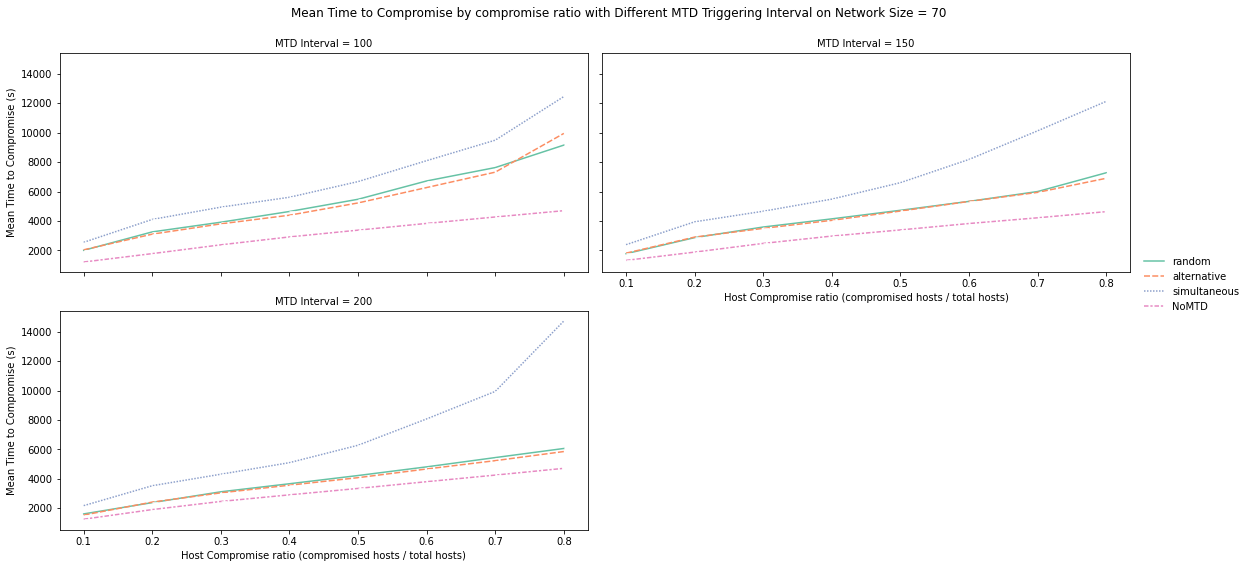

In [11]:
mttc_ratio_interval_results = results_avg[results_avg['Network Size']==70]

g = sns.FacetGrid(mttc_ratio_interval_results, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different MTD Triggering Interval on Network Size = 70')
savefig('experimental_data/plots/multiple_mttc_ratio_interval.jpg')
plt.show()

## Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 100

Saving figure to file experimental_data/plots/multiple_mttc_ratio_size.jpg


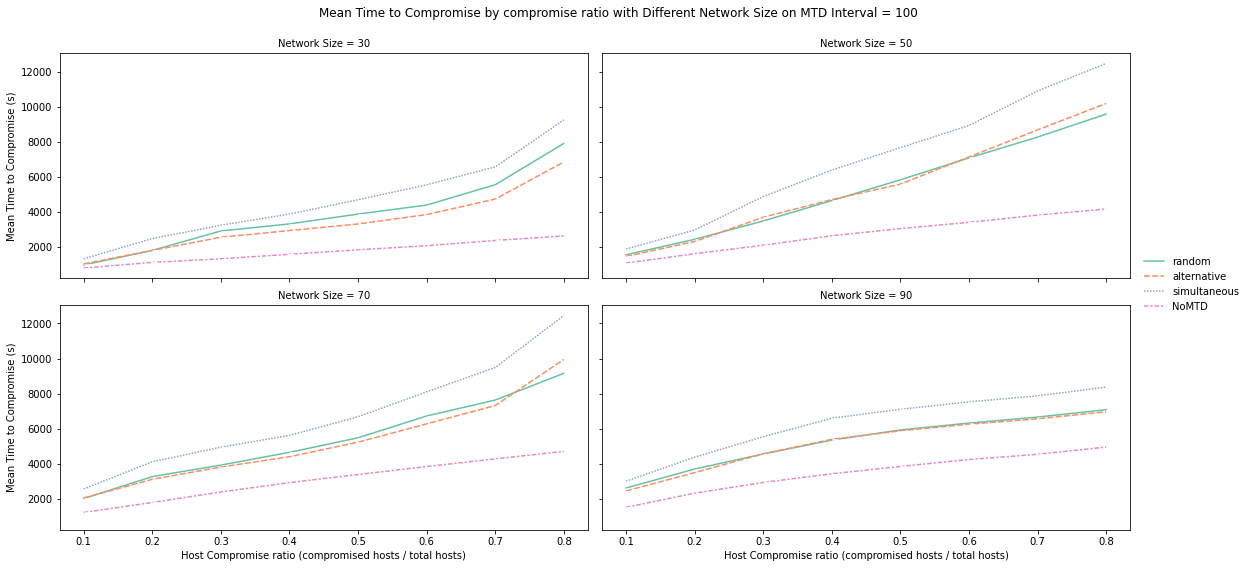

In [12]:
mttc_ratio_size_results = results_avg[results_avg['MTD Interval']==100]

g = sns.FacetGrid(mttc_ratio_size_results, col="Network Size",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 100')
savefig('experimental_data/plots/multiple_mttc_ratio_size.jpg')
plt.show()

## Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8

Saving figure to file experimental_data/plots/multiple_mttc_size_interval.jpg


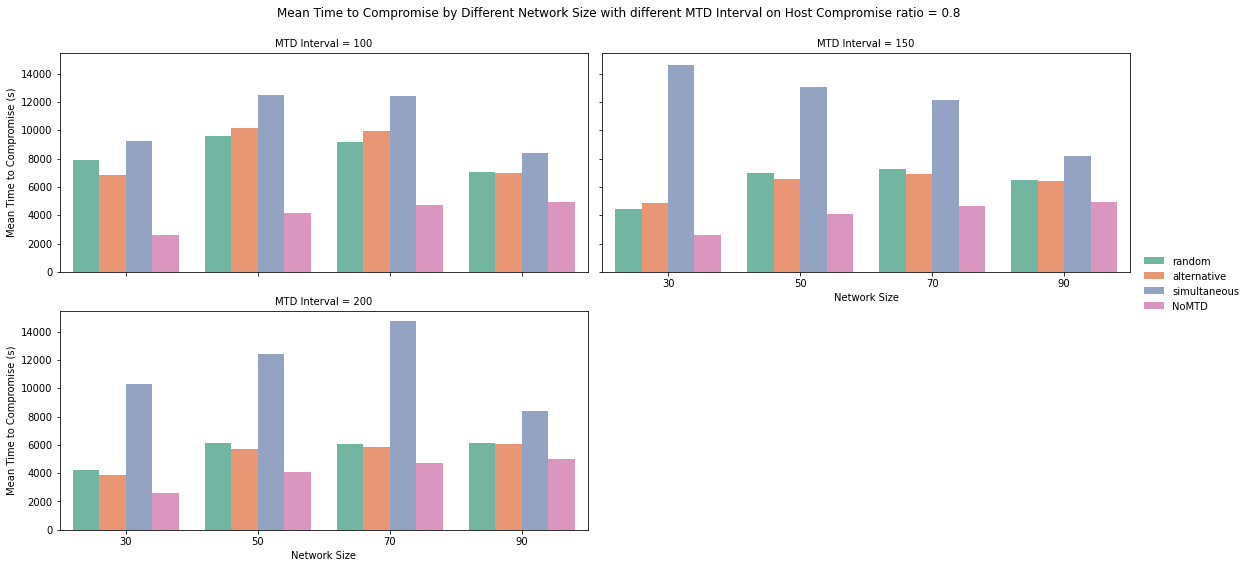

In [13]:
mttc_size_interval_results = results_avg[results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8]

g = sns.FacetGrid(mttc_size_interval_results, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Mean Time to Compromise (s)", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8')
savefig('experimental_data/plots/multiple_mttc_size_interval.jpg')
plt.show()

## Attack Success Rate by Network Size with Different MTD Interval

Saving figure to file experimental_data/plots/multiple_asr_interval_size.jpg


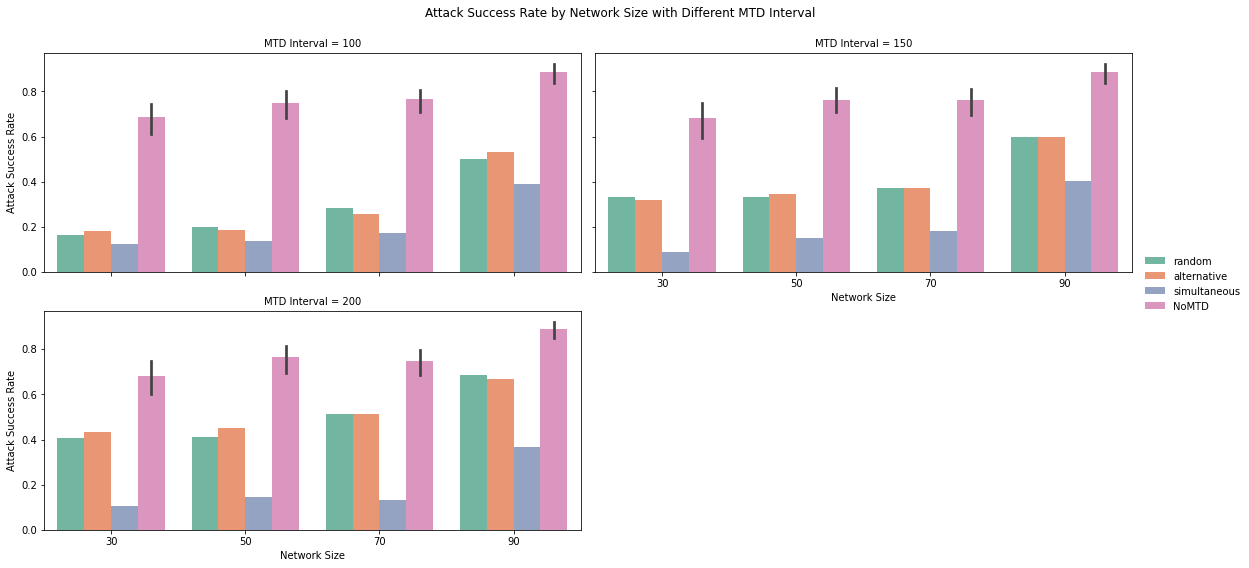

In [14]:
# plt.figure(figsize=(17, 10))
# sns.barplot(data=results_avg, x='MTD Interval', y='Attack Success Rate', hue='Name')
# plt.legend(loc='upper right')
# plt.title('Attack Success Rate at 10000s simulation time with different MTD triggering interval')
# savefig('experimental_data/plots/multiple_mtd_sim_asr.jpg')
# plt.show()


g = sns.FacetGrid(results_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Attack Success Rate", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Attack Success Rate by Network Size with Different MTD Interval')
savefig('experimental_data/plots/multiple_asr_interval_size.jpg')
plt.show()

## The number of hosts being compromised at 10000s simulation time with 4 different MTD triggering interval

In [15]:
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=results_avg, x='MTD Interval', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
# plt.figure(figsize=(17, 10))
# sns.barplot(data=results_avg, x='MTD Interval', y='Compromised Num', hue='Name')
# plt.legend(loc='upper right')
# plt.title('The number of hosts being compromised at 10000s simulation time with different MTD triggering interval')
# savefig('experimental_data/plots/multiple_mtd_sim_cn.jpg')
# plt.show()